In [33]:
import sys
sys.executable

'C:\\Users\\Tausif Ansari\\AppData\\Local\\Programs\\Python\\Python313\\python.exe'

In [38]:
import numpy as np
import pandas as pd

Data = pd.read_csv(r"C:\Users\Tausif Ansari\Downloads\tested.csv")
df1=Data.copy()
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 🔹Basic Data Understanding
### 1. How many rows and columns are there in the dataset?

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


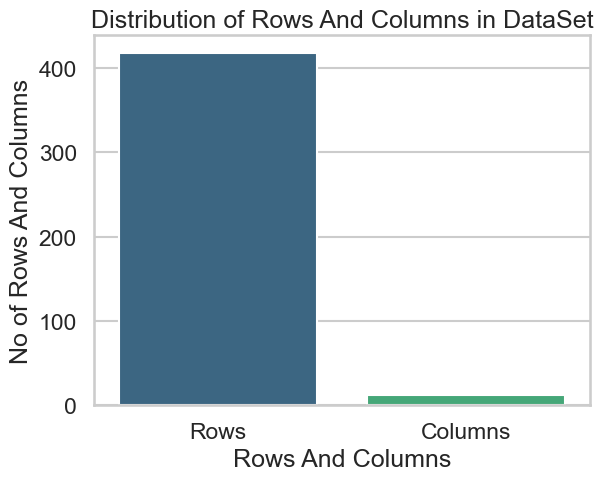

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
columns=len(df1.columns)
row=df1['PassengerId'].count()
data=pd.DataFrame({'Type':['Rows','Columns'],'value':[row,columns]})

sns.barplot(x='Type',hue='Type', y='value',data=data, palette='viridis')

plt.title('Distribution of Rows And Columns in DataSet')
plt.xlabel('Rows And Columns')
plt.ylabel('No of Rows And Columns')
plt.show()

In [37]:
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())

### 2.What are the data types of each column, and are they appropriate?

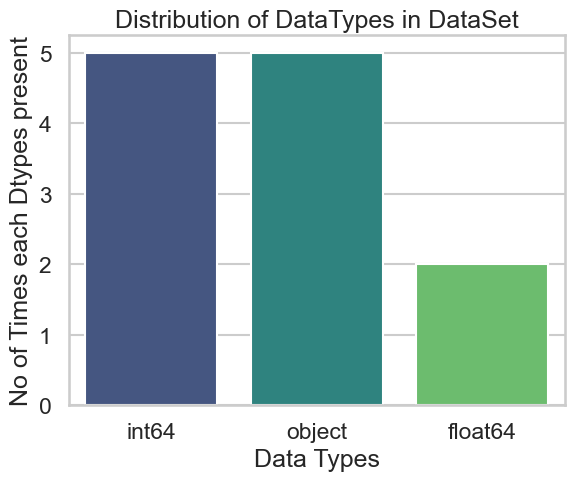

In [41]:
dtypes=[]
for cols in df1:
    # print(f"{cols:<12}{str(df1[cols].dtype):<12}")
    dtypes.append(str(df1[cols].dtype))
Data=pd.Series(dtypes,name='Dtypes')
Data=Data.value_counts()
Data=pd.DataFrame(Data).reset_index()

import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='Dtypes',y='count',hue='Dtypes',data=Data, palette='viridis')

plt.title('Distribution of DataTypes in DataSet')
plt.xlabel('Data Types')
plt.ylabel('No of Times each Dtypes present')
plt.show()

### 3.Are there any missing values in the dataset? If yes, which columns have them and how many?

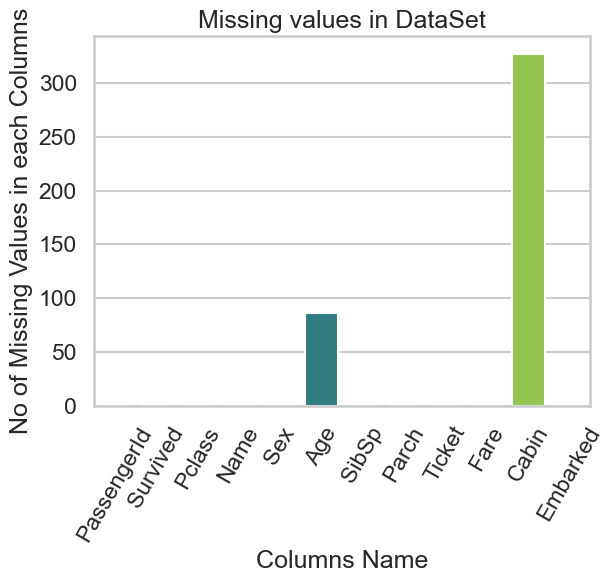

In [42]:
Data = df1.isna().sum()
Data = pd.DataFrame(Data).reset_index().rename(columns={'index':'Column Name',0:'Empty Value'})

import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='Column Name',y='Empty Value',hue='Column Name',data=Data, palette='viridis')

plt.title('Missing values in DataSet')
plt.xticks(rotation=60)
plt.xlabel('Columns Name')
plt.ylabel('No of Missing Values in each Columns')
plt.show()

### 4. Are there any duplicate rows in the dataset?

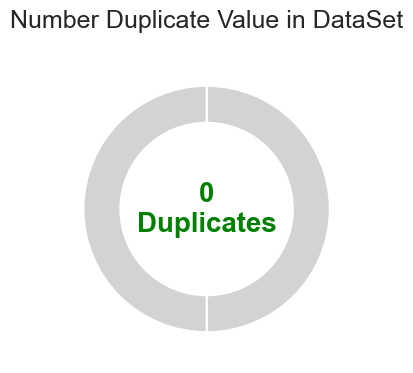

In [43]:
Data = df1[df1.duplicated()].sum().sum()
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(aspect="equal"))

ax.pie([1, 1], colors=['lightgray'], startangle=90, counterclock=False,wedgeprops=dict(width=0.3))

plt.text(0, 0, f"{int(Data)}\nDuplicates", ha='center', va='center', fontsize=20, weight='bold', color='green')

plt.title("Number Duplicate Value in DataSet", pad=20)
plt.show()

### 5.What are the unique values or categories in categorical columns (Sex, Embarked, Cabin, Pclass)?

In [8]:
print("Unique Value in Sex Column:",df1['Sex'].unique())
print("Unique Value in Embarked Column:",df1['Embarked'].unique())
print("unique value in Pclass Column:",df1['Pclass'].unique())

Unique Value in Sex Column: ['male' 'female']
Unique Value in Embarked Column: ['Q' 'S' 'C']
unique value in Pclass Column: [3 2 1]


# 🔹 Descriptive Statistics
### 6. What are the summary statistics (mean, median, mode, std) for numeric columns like Age, Fare, SibSp, and Parch?

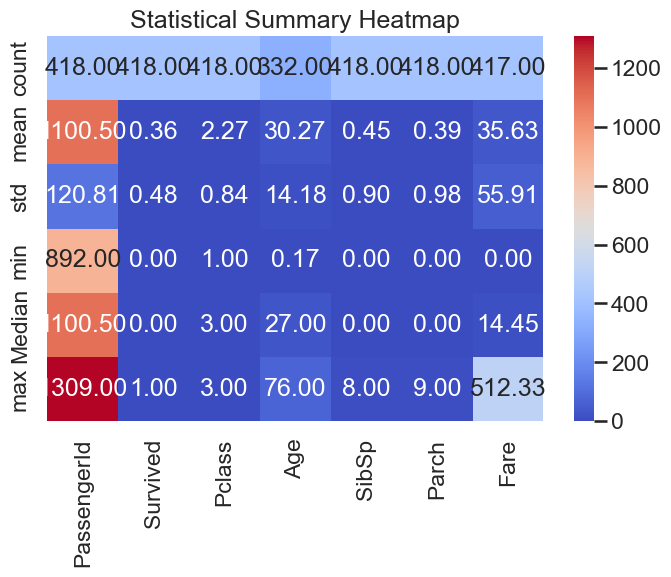

In [44]:
Data = df1.describe()
Data = Data.rename(index={'50%':'Median'})
Data = Data.iloc[np.r_[:4,5,7]]
# Data = Data.iloc[:,1:].T.reset_index().melt(id_vars="index",var_name="Statistics",value_name="Values")
plt.figure(figsize=(8,5))
sns.heatmap(Data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Statistical Summary Heatmap")
plt.show()

### 7. What is the distribution of Age — is it skewed or normally distributed?

In [45]:
df1.drop('Cabin',axis=1,inplace=True)
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())

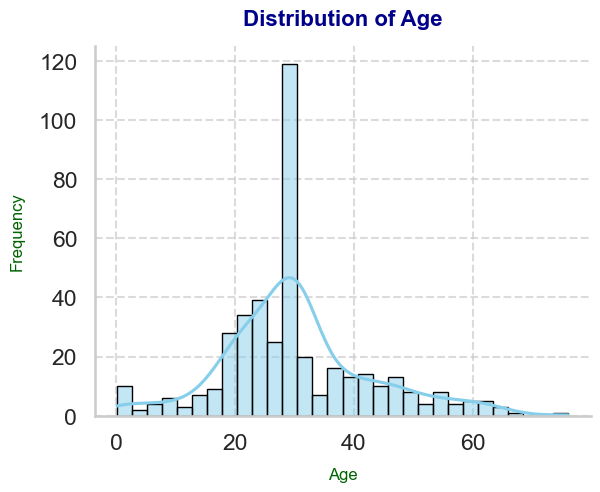

In [46]:
sns.histplot(df1['Age'],bins=30,kde=True,color='skyblue',edgecolor='black',linewidth=1)
sns.set_style("whitegrid")   
sns.set_context("talk")      
plt.title('Distribution of Age', fontsize=16, fontweight='bold', color='darkblue', pad=15)
plt.xlabel('Age', fontsize=12, color='darkgreen', labelpad=10)
plt.ylabel('Frequency', fontsize=12, color='darkgreen', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine() 
plt.show()

### 8.What is the distribution of Fare — are there outliers or extreme values?

Count of outliers:
Class 1: 1
Class 2: 5
Class 3: 14


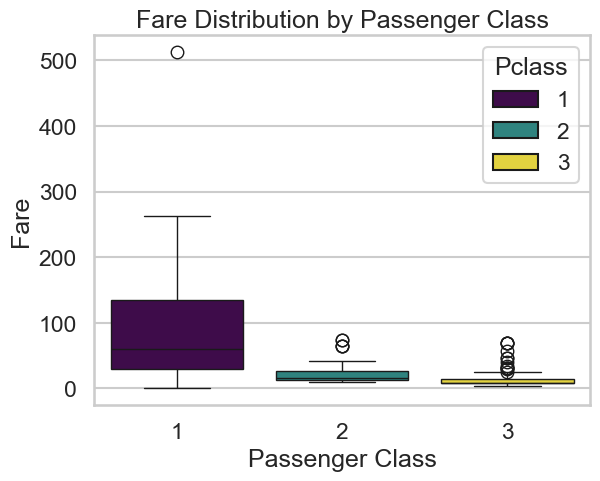

In [47]:
# Passenger Class 1
df1Cls1 = df1[df1['Pclass'] == 1]
Q11 = df1Cls1['Fare'].quantile(0.25)
Q13 = df1Cls1['Fare'].quantile(0.75)
IQR1 = Q13 - Q11
R11 = Q11 - 1.5 * IQR1
R12 = Q13 + 1.5 * IQR1
Outlier1 = df1Cls1['Fare'][(df1Cls1['Fare'] < R11) | (df1Cls1['Fare'] > R12)]

# Passenger Class 2
df1Cls2 = df1[df1['Pclass'] == 2]
Q21 = df1Cls2['Fare'].quantile(0.25)
Q23 = df1Cls2['Fare'].quantile(0.75)
IQR2 = Q23 - Q21
R21 = Q21 - 1.5 * IQR2
R22 = Q23 + 1.5 * IQR2
Outlier2 = df1Cls2['Fare'][(df1Cls2['Fare'] < R21) | (df1Cls2['Fare'] > R22)]

# Passenger Class 3
df1Cls3 = df1[df1['Pclass'] == 3]
Q31 = df1Cls3['Fare'].quantile(0.25)
Q33 = df1Cls3['Fare'].quantile(0.75)
IQR3 = Q33 - Q31
R31 = Q31 - 1.5 * IQR3
R32 = Q33 + 1.5 * IQR3
Outlier3 = df1Cls3['Fare'][(df1Cls3['Fare'] < R31) | (df1Cls3['Fare'] > R32)]

# Display results
print("Count of outliers:")
print("Class 1:", len(Outlier1))
print("Class 2:", len(Outlier2))
print("Class 3:", len(Outlier3))

#Visualization
sns.boxplot(x='Pclass', y='Fare', hue='Pclass',data=df1, palette='viridis')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

### 9.What are the minimum and maximum values for Age and Fare?

In [48]:
df1.fillna({'Fare':df1['Fare'].mean()},inplace=True)

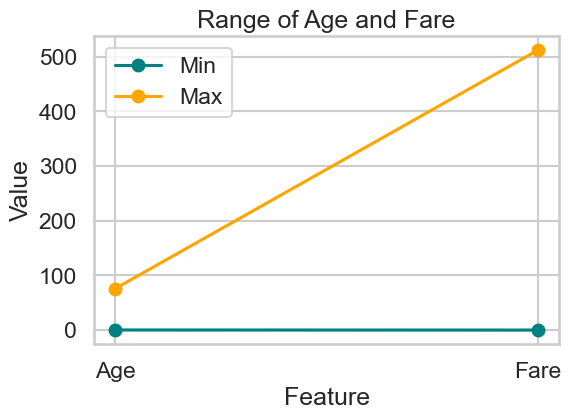

In [49]:
agg_df = df1.agg({'Age':['min','max'], 'Fare':['min','max']}).T.reset_index()
agg_df.columns = ['Feature', 'Min', 'Max']

plt.figure(figsize=(6,4))
plt.plot(agg_df['Feature'], agg_df['Min'], marker='o', label='Min', color='teal')
plt.plot(agg_df['Feature'], agg_df['Max'], marker='o', label='Max', color='orange')
plt.title('Range of Age and Fare')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.legend()
plt.show()


### 10. How many unique passenger classes (Pclass) exist, and what are their frequencies?

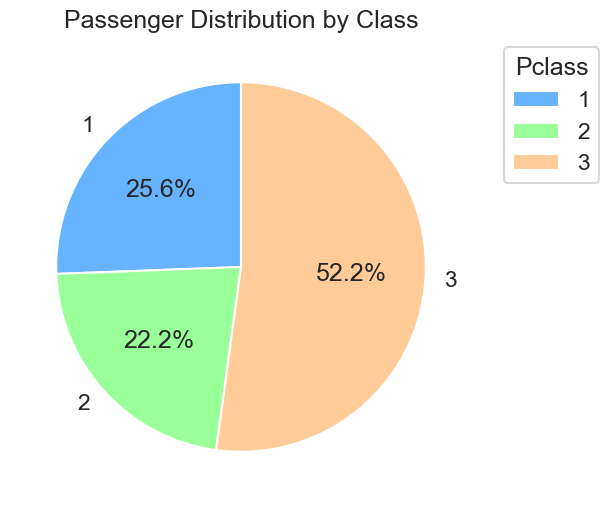

In [50]:
Data = df1.groupby('Pclass').agg({'PassengerId':'count'}).reset_index()
plt.figure(figsize=(6,6))
plt.pie(Data['PassengerId'],labels=Data['Pclass'],autopct='%1.1f%%',startangle=90,colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Passenger Distribution by Class')
plt.legend(title='Pclass', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

# 🔹 Target Variable (Survived)
### 11. What is the overall survival rate (percentage of passengers who survived)?

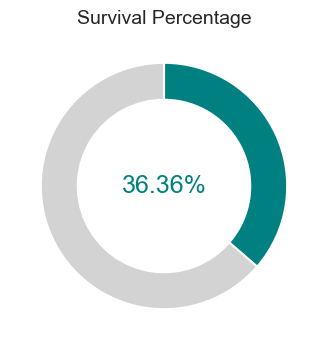

In [51]:
survive = df1['Survived'][df1['Survived'].eq(1)].count()
survivor = (survive/df1['Survived'].count())*100

fig,ax = plt.subplots(figsize=(4,4))
ax.pie([survivor,100-survivor],colors=['teal', 'lightgray'],startangle=90, counterclock=False,wedgeprops=dict(width=0.3))

# Add center text
plt.text(0, 0, f'{survivor:.2f}%', ha='center', va='center', fontsize=18, color='teal')
plt.title('Survival Percentage', fontsize=14)
plt.show()

### 12. What is the survival rate by sex — did women have a higher chance of survival?

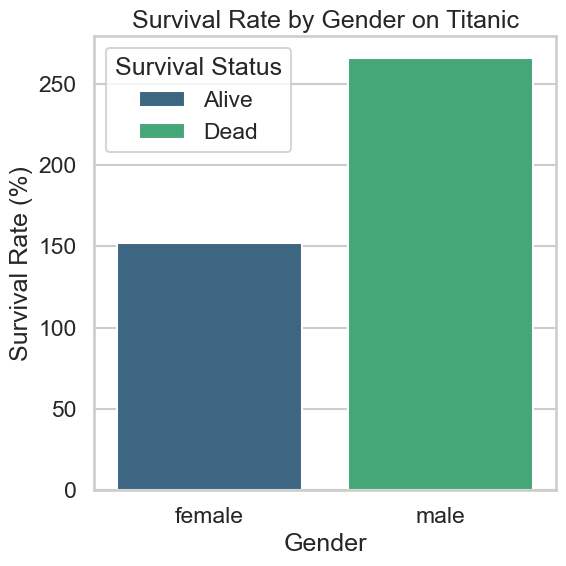

In [52]:
Data = df1.groupby(['Sex', 'Survived']).size().reset_index(name='Totals')
Data['Survived'] = Data['Survived'].map({1: 'Alive', 0: 'Dead'})

plt.figure(figsize=(6,6))
sns.barplot(x='Sex', y='Totals', hue='Survived', data=Data, palette='viridis')
plt.title('Survival Rate by Gender on Titanic')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.legend(title='Survival Status')
plt.tight_layout()
plt.show()

### 13. What is the survival rate by passenger class (Pclass)?

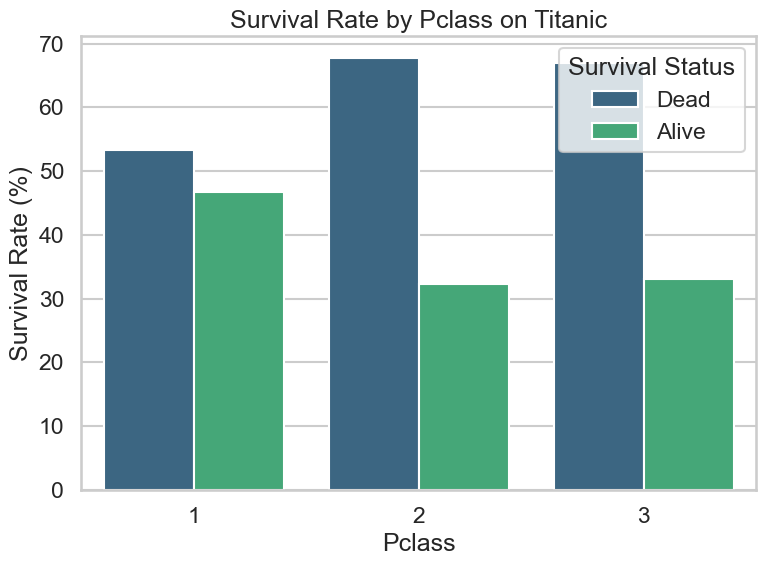

In [53]:
Data = df1.groupby(['Pclass','Survived']).size().reset_index(name='Totals')
Data['Survived'] = Data['Survived'].map({0:'Dead',1:'Alive'})
Data['Survival Rate'] = round((Data['Totals']/Data.groupby('Pclass')['Totals'].transform('sum'))*100,3)

plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survival Rate', hue='Survived', data=Data, palette='viridis')
plt.title('Survival Rate by Pclass on Titanic')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.legend(title='Survival Status')
plt.tight_layout()
plt.show()

### 14. What is the survival rate by Embarked location (C, Q, S)?

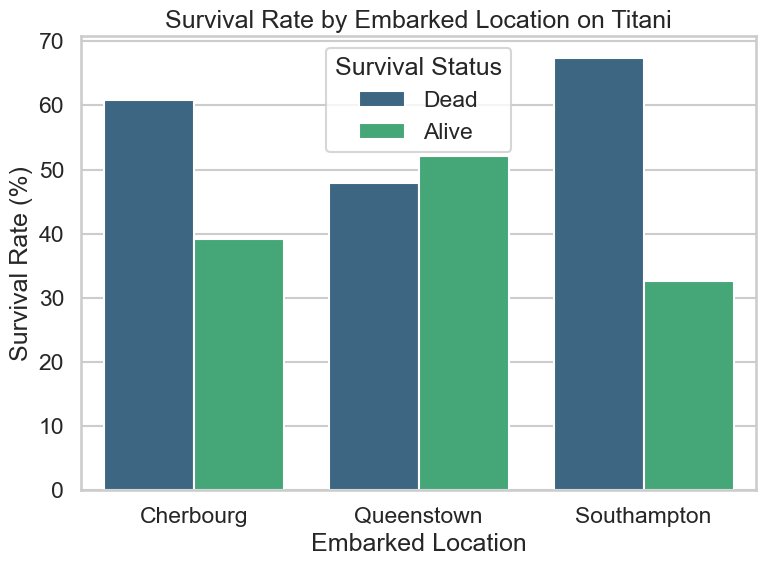

In [54]:
Data = df1.groupby(['Embarked','Survived']).size().reset_index(name='Total')
Data['Survived'] = Data['Survived'].map({0:'Dead',1:'Alive'})
Data['Survival Rate'] = round((Data['Total']/Data.groupby('Embarked')['Total'].transform('sum'))*100,3)
Data['Embarked'] = Data['Embarked'].map({'C':'Cherbourg','Q':'Queenstown','S':'Southampton'})

plt.figure(figsize=(8,6))
sns.barplot(x='Embarked',y='Survival Rate',hue='Survived',data=Data,palette='viridis')
plt.title('Survival Rate by Embarked Location on Titani')
plt.xlabel('Embarked Location')
plt.ylabel('Survival Rate (%)')
plt.legend(title='Survival Status')
plt.tight_layout()
plt.show()

### 15. How does Age relate to survival — did younger passengers survive more often?

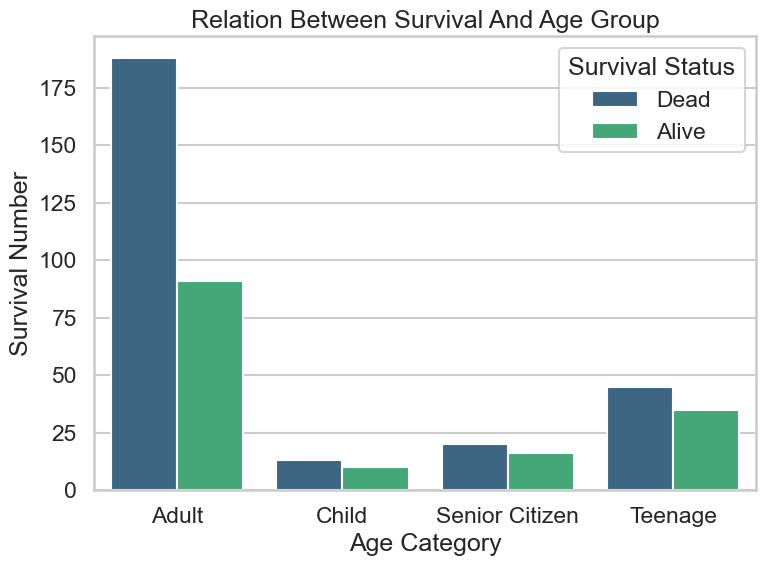

In [55]:
def func(x):
    if x<12:
        return 'Child'
    elif x<23:
        return 'Teenage'
    elif x<50:
        return 'Adult'
    else:
        return 'Senior Citizen'
        
df1['Age_Cat'] = df1['Age'].apply(func)
Data = df1.groupby(['Age_Cat','Survived']).size().reset_index(name='Total')
Data['Survived'] = Data['Survived'].map({0:'Dead',1:'Alive'})

plt.figure(figsize=(8,6))
sns.barplot(x='Age_Cat',y='Total',hue='Survived',data=Data,palette='viridis')
plt.title('Relation Between Survival And Age Group')
plt.xlabel('Age Category')
plt.ylabel('Survival Number')
plt.legend(title='Survival Status')
plt.tight_layout()
plt.show()

# 🔹 Feature Relationships
### 16. Does family size (SibSp + Parch) affect survival probability?

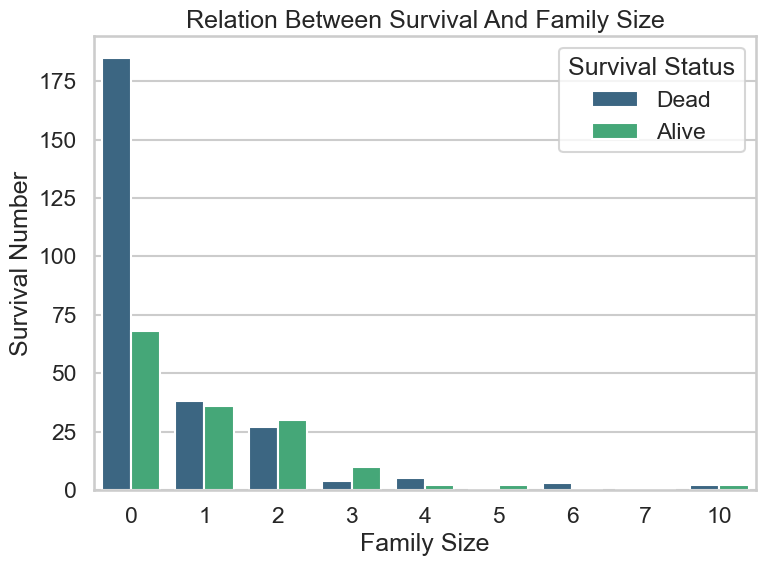

In [56]:
df1['Family Size'] = df1['SibSp']+df1['Parch']
Data = df1.groupby(['Family Size','Survived']).size().reset_index(name='Total')
Data['Survived'] = Data['Survived'].map({0:'Dead',1:'Alive'})

plt.figure(figsize=(8,6))
sns.barplot(x='Family Size',y='Total',hue='Survived',data=Data,palette='viridis')
plt.title('Relation Between Survival And Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Number')
plt.legend(title='Survival Status')
plt.tight_layout()
plt.show()

### 17. What is the relationship between Fare and Survival — did higher-paying passengers survive more?

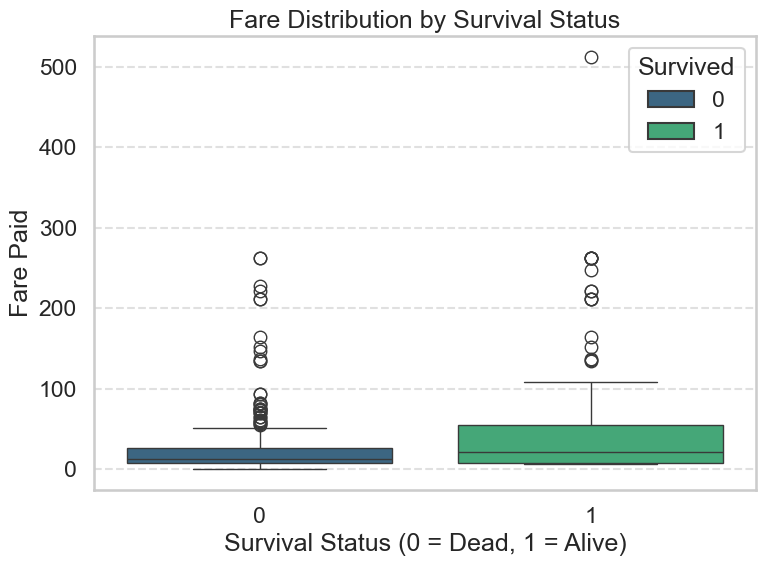

In [57]:
Data = df1.groupby('Survived')[['Fare']].mean().reset_index()
Data['Survived'] = Data['Survived'].map({0:'Dead',1:'Alive'})

plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare',hue='Survived', data=df1, palette='viridis')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survival Status (0 = Dead, 1 = Alive)')
plt.ylabel('Fare Paid')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 18. Is there a correlation between numeric features (Age, Fare, SibSp, Parch, Pclass)?

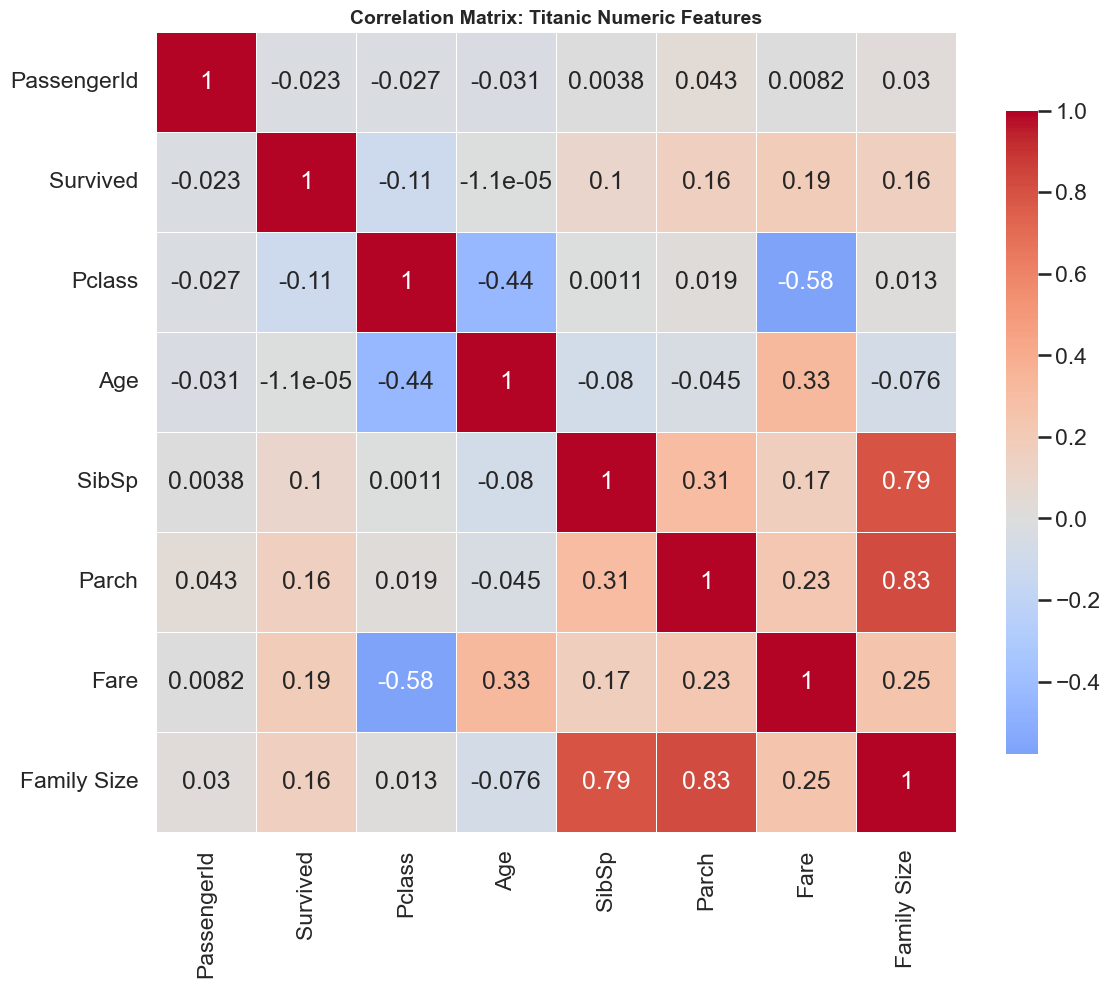

In [58]:
Data = df1.corr(method='pearson',numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(Data, annot=True, cmap='coolwarm', center=0,square=True, linewidths=0.7, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix: Titanic Numeric Features', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# 🔹 Categorical Exploration
### 19. What is the distribution of Sex across different Pclass values?

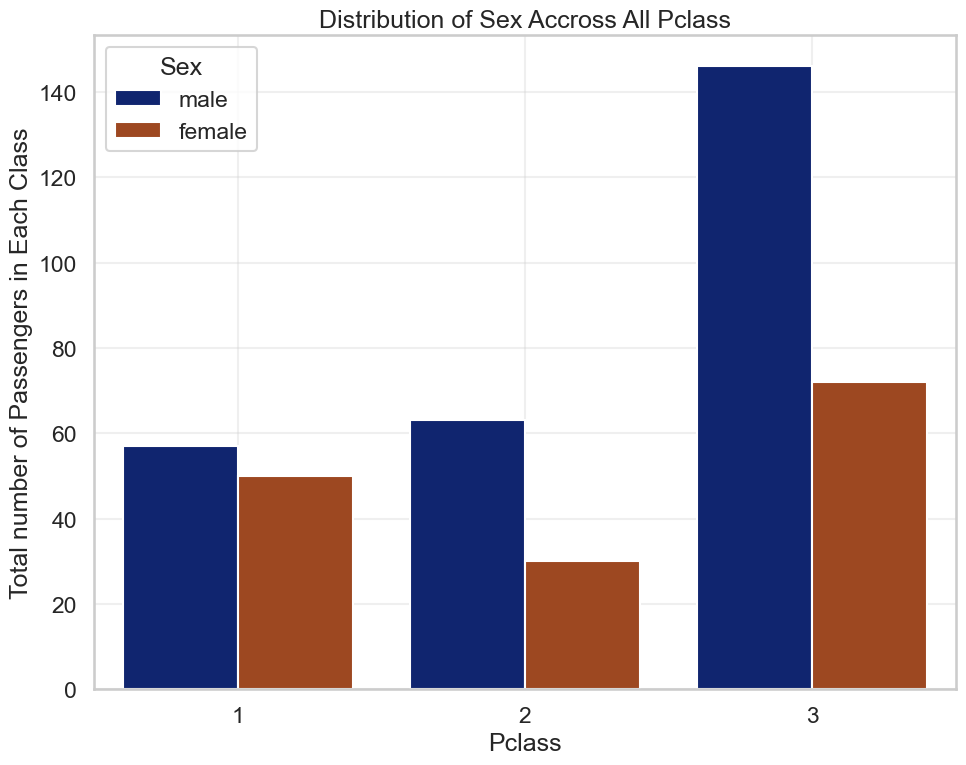

In [59]:
Data = df1.groupby('Pclass')['Sex'].value_counts().reset_index(name='Count')
plt.figure(figsize=(10,8))
sns.barplot(x='Pclass', y='Count',hue='Sex', data=Data,palette='dark',)
plt.title('Distribution of Sex Accross All Pclass')
plt.xlabel('Pclass')
plt.ylabel('Total number of Passengers in Each Class')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 20.Which Embarked port had the highest number of passengers and survivors?

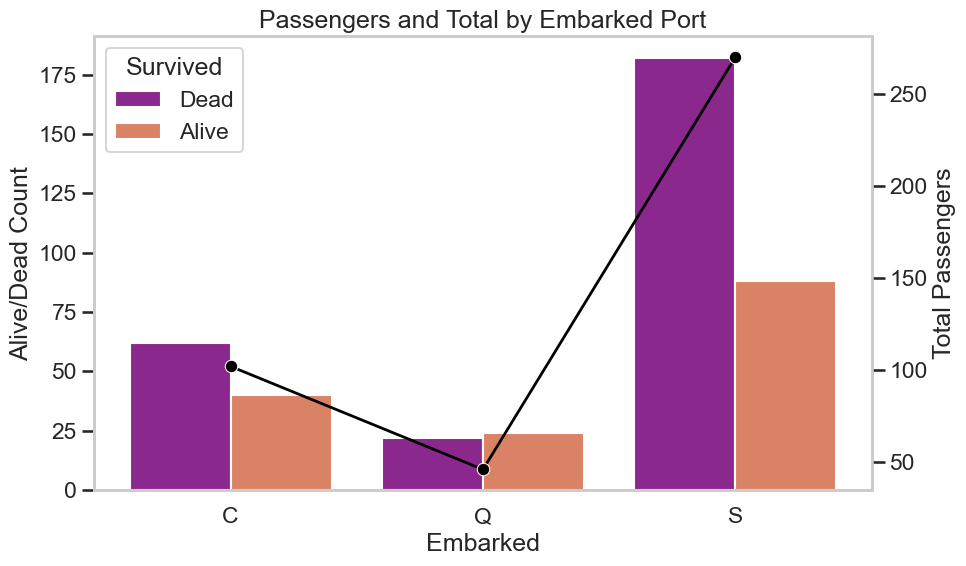

In [60]:
Data = df1.groupby(['Embarked','Survived'])['PassengerId'].size().reset_index(name='Total')
Data['Survived'] = Data['Survived'].map({0:'Dead',1:'Alive'})
Data['Total Passengers'] = Data.groupby('Embarked')['Total'].transform('sum')

fig, ax1 = plt.subplots(figsize=(10,6))

# Survival counts (bar)
sns.barplot(x='Embarked', y='Total', hue='Survived', data=Data, palette='plasma', ax=ax1)
ax1.set_ylabel('Alive/Dead Count')
ax1.set_title('Passengers and Total by Embarked Port')
ax1.grid(visible=False,axis='both',which='both')

# Total passengers (line)
ax2 = ax1.twinx()
sns.lineplot(x='Embarked', y='Total Passengers', data=Data.drop_duplicates('Embarked'),
             color='black', marker='o', linewidth=2, ax=ax2)
ax2.set_ylabel('Total Passengers')
ax2.grid(visible=False)
plt.tight_layout()
plt.show()


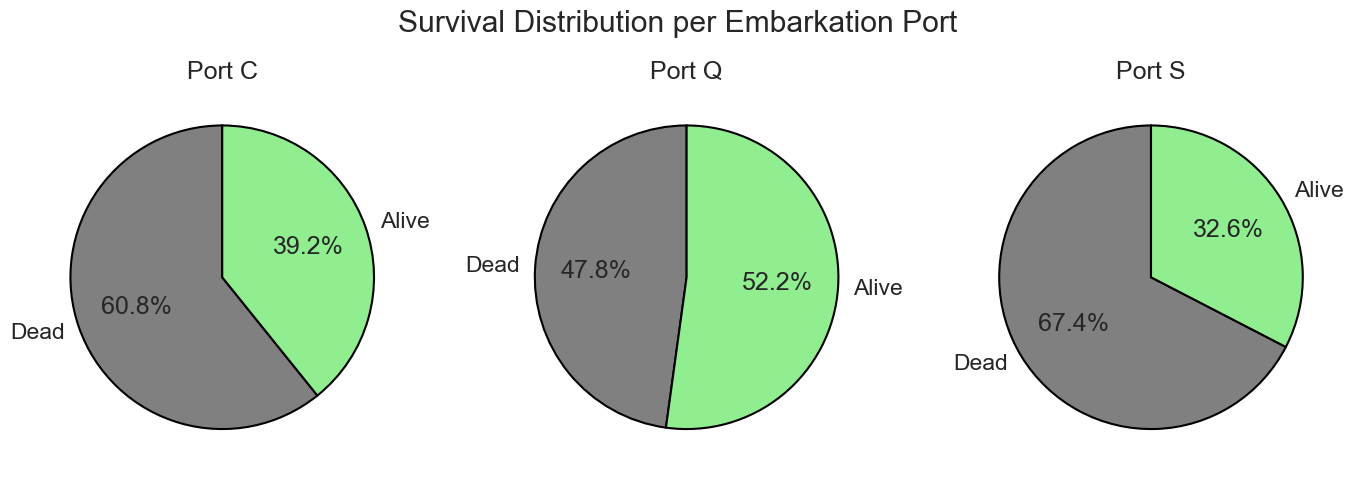

In [61]:
ports = Data['Embarked'].unique()
fig, axes = plt.subplots(1, len(ports), figsize=(14,5))

for i, port in enumerate(ports):
    d = Data[Data['Embarked']==port]
    axes[i].pie(d['Total'], labels=d['Survived'], autopct='%1.1f%%', startangle=90,
                colors=['gray','lightgreen'], wedgeprops=dict(edgecolor='black'))
    axes[i].set_title(f'Port {port}')

plt.suptitle('Survival Distribution per Embarkation Port')
plt.tight_layout()
plt.show()


### 21. Are there duplicate or similar Ticket numbers? If so, what does that indicate (families or groups)?

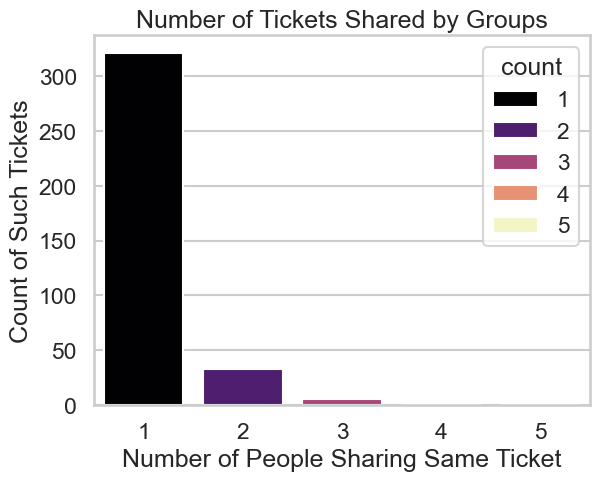

In [29]:
duplicates = df1[df1.duplicated('Ticket', keep=False)].sort_values('Ticket')
duplicates[['Ticket', 'Name', 'Pclass', 'Fare', 'SibSp', 'Parch']].head(10)
ticket_counts = df1['Ticket'].value_counts()
ticket_counts[ticket_counts > 1].head(10)
group_sizes = df1['Ticket'].value_counts().value_counts().sort_index()

sns.barplot(x=group_sizes.index, y=group_sizes.values,hue=group_sizes.index, palette='magma')
plt.title('Number of Tickets Shared by Groups')
plt.xlabel('Number of People Sharing Same Ticket')
plt.ylabel('Count of Such Tickets')
plt.show()

### 22.How do different combinations (e.g., Sex + Pclass, or Embarked + Sex) affect survival probability?

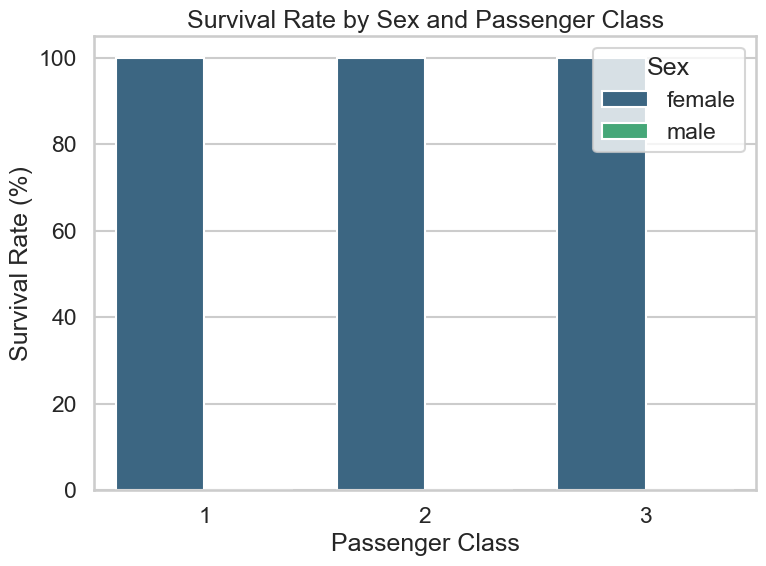

In [62]:
Data = df1.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()
Data['Survived'] *= 100  # convert to percentage

plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=Data, palette='viridis')
plt.title('Survival Rate by Sex and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

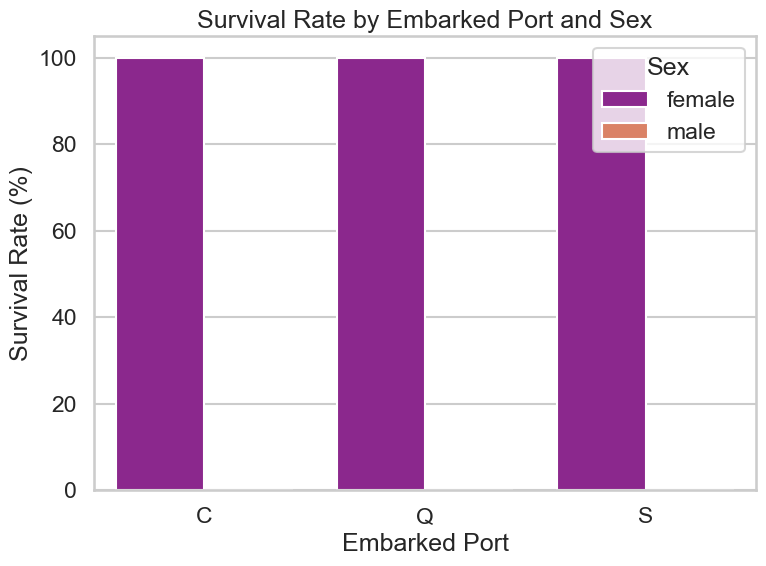

In [63]:
Data2 = df1.groupby(['Embarked', 'Sex'])['Survived'].mean().reset_index()
Data2['Survived'] *= 100

plt.figure(figsize=(8,6))
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=Data2, palette='plasma')
plt.title('Survival Rate by Embarked Port and Sex')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate (%)')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

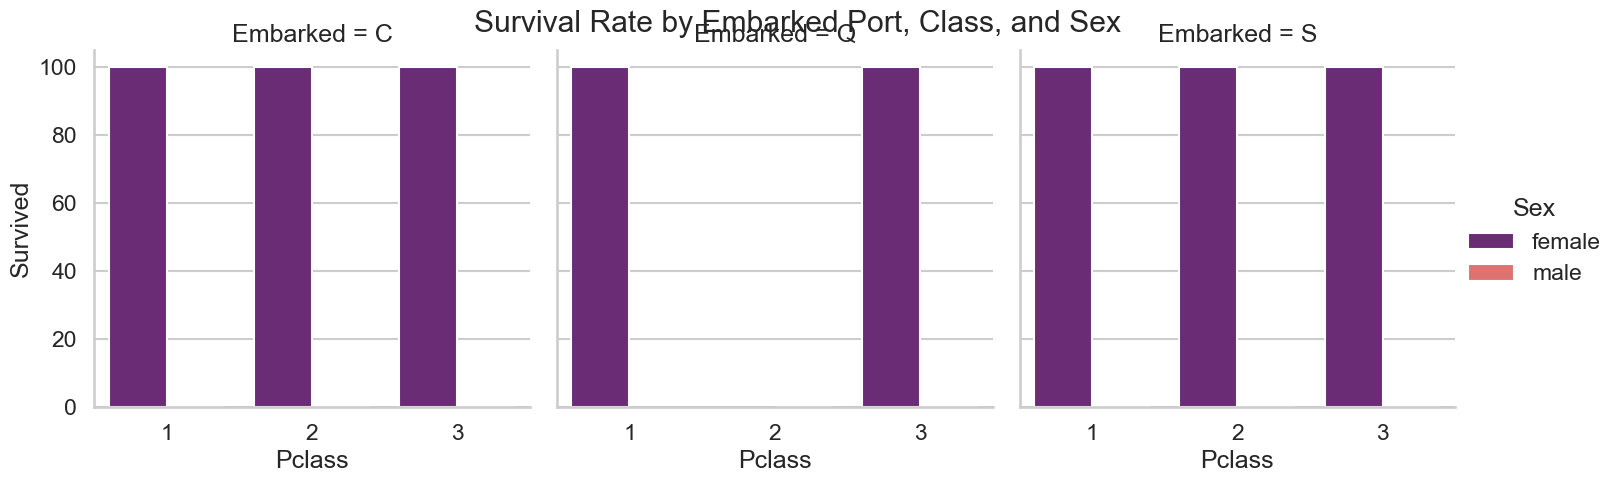

In [64]:
Data3 = df1.groupby(['Embarked', 'Pclass', 'Sex'])['Survived'].mean().reset_index()
Data3['Survived'] *= 100

plt.figure(figsize=(10,6))
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked',
            data=Data3, kind='bar', col_wrap=3, palette='magma')
plt.subplots_adjust(top=0.9)
plt.suptitle('Survival Rate by Embarked Port, Class, and Sex')
plt.show()